In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr
import seaborn as sns

In [3]:
df = pdr.data.DataReader(['DGS6MO', 'DGS1'],
                        data_source='fred',
                        start='01-01-2022',
                        end='12-31-2022')

In [4]:
df = df.dropna()

In [5]:
df = df.rename(columns={'DGS6MO': 'X1',
                       'DGS1': 'X2'})

In [6]:
X_df = df.pct_change()
X_df = X_df.dropna()

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [9]:
from sklearn.covariance import EmpiricalCovariance
x1_array = np.linspace(-6, 6, 601)
x2_array = np.linspace(-6, 6, 601)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
xx12 = np.c_[xx1.ravel(), xx2.ravel()]

In [10]:
COV = EmpiricalCovariance().fit(X_scaled)

mahal_sq_Xc = COV.mahalanobis(xx12)
mahal_sq_dd = mahal_sq_Xc.reshape(xx1.shape)
mahal_dd = np.sqrt(mahal_sq_dd)

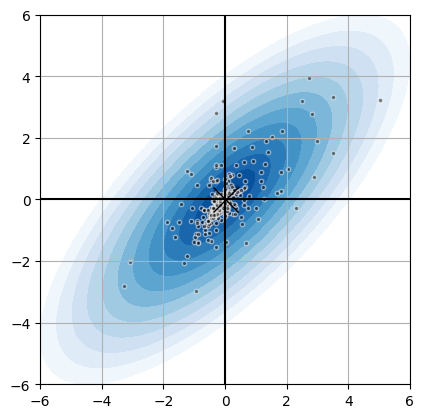

In [11]:
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, mahal_dd,
            cmap='Blues_r', levels=np.linspace(0, 6, 13))
plt.scatter(X_scaled[:,0], X_scaled[:, 1],
           s=38, edgecolor='w', alpha=0.5,
           marker='.', color='k')

plt.plot(X_scaled[:,0].mean(), X_scaled[:,1].mean(),
        marker='x', color='k', markersize=18)

ax.axvline(x=0,c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [14]:
loadings = pca.components_.T
V = loadings

In [15]:
print(np.round(V.T @ V))
print(np.round(V @ V.T))

[[ 1. -0.]
 [-0.  1.]]
[[1. 0.]
 [0. 1.]]


In [16]:
v1 = V[:, [0]]
v2 = V[:, [1]]

In [17]:
def draw_vector(vector, RBG):
    array = np.array([[0,0,vector[0],vector[1]]], dtype=object)
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V, angles='xy',
              scale_units='xy',scale=1,color=RBG,
              zorder=1e5)

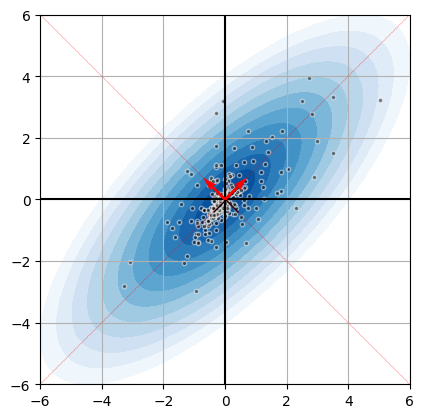

In [18]:
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, mahal_dd,
            cmap='Blues_r', levels=np.linspace(0,6,13))

plt.scatter(X_scaled[:,0],X_scaled[:,1],
           s=38,edgecolor='w', alpha=0.5,marker='.',color='k')
plt.plot(X_scaled[:,0].mean(), X_scaled[:,1].mean(),
         marker='x',color='k',markersize=18)

draw_vector(v1,'r')
draw_vector(v2,'r')

ax.plot(x1_array,x1_array*v1[1]/v1[0], 'r',
 lw = 0.25, ls = 'dashed')
ax.plot(x1_array,x1_array*v2[1]/v2[0], 'r',
 lw = 0.25, ls = 'dashed')
ax.axvline(x = 0, c = 'k'); ax.axhline(y = 0, c = 'k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower = -6, upper = 6)
ax.set_ybound(lower = -6, upper = 6)